In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
###utility functions#####
#function 1
def lateralSA(r,h, pi = 3.143):
    l = (r**2+h**2)**0.5
    return pi*r*l

#funciton 2
def totalSA(r,h, pi = 3.143):
    return lateralSA(r,h) + pi*r**2

#constraint_function
def volume(r, h, pi = 3.143):
    return (1/3)*pi*h*r**2

def flipBit(s, prob):
    assert s in ["0", "1"]
    assert prob in [0,1]
    if prob==1:
        return '1' if s=='0' else '0'
    return s
def applyBounds(x, lower, upper):
    #x (float)
    y = max(x,lower)
    y = min(x,upper)
    y = np.around(y,2)
    return y


In [116]:
def float2binary(parent, nvar, ndec=2, chromosome_size=11):
    """
    Converts each of the nvar values of the parent to binary of size "chromosome_size" and concatenates them
    to 1 string
    Args:
        parent (list) - list of nvar floating values
        nvar (int) - no. of variables, the size of parent
        ndec (int) - max no. of decimal points of each values in parent
        chromosome_size (int) - no. of bits to which each value in parent is converted
    Return:
        parent_bin (str) - binary no. string made by concatenating each value's binary equivalent
    """
    parent_bin = ""
    for i in range(nvar):
        val = int(parent[i]*10**ndec) #converting from float to int, later will be converted back
        binary = bin(val)[2:]
        binary = "0"*(chromosome_size-len(binary)) + binary
        parent_bin = parent_bin + binary
    return parent_bin
def binary2float(child, nvar, ndec=2, chromosome_size=11):
    """
    Converts the child string to nvar float values by reversin the effect of float2binary
    Args:
        child (str) - binary no. string made by concatenating each value's binary equivalent,
                     size - nvar*chromosome_size
        nvar (int) - no. of variables whose binary are concatenated in child
        ndec (int) - max no. of decimal points of each values 
        chromosome_size (int) - no. of bits of each value in child
    Return:
        child (list) - list of nvar floating values
    """
    child_float = []
    
    for i in range(nvar):
        val = child[i*chromosome_size:(i+1)*chromosome_size]
        val = int(val, 2)/10**ndec    #converting to float, reversing the effect of binary conversion
        child_float.append(val)
        
    return child_float

In [75]:
#verify correctness
binary2float(float2binary([2.0,3.0,10.0],3,0,4),3,0,4) 

[2.0, 3.0, 10.0]

In [36]:
def initialize_population(npop, nvar = 2, var_range = [(0,10), (0,20)], ndecimal = 2, seed = 0):
    """Initializes population and returns it
    Args:
        npop (int)- population size
        nvar (int)- no. of variables in the problem
        var_range (list) - a list of tuples, where ith tuple is the range of values ith variable takes
        ndecimal (int)- max no. digits after decimal points the variables can take, helps in converting to binary
        seed (int)- numpy random seed 
    Return:
        initial_pop (2d-array of size (npop,nvar)) - ith row corresponsds to ith member in population
                                                            which is a list of nvar values
    """
    np.random.seed(seed)
    initial_pop = []
    for i in range(nvar):
        var_size = var_range[i]
        new_member = np.around(np.random.uniform(var_size[0], var_size[1], (1,npop)), 2)
        initial_pop.append(new_member)
    initial_pop = np.array(initial_pop).T
    return initial_pop.squeeze()

In [22]:
np.random.seed(0)
a = np.random.uniform(0, 10, (1,5))
b = np.random.uniform(0, 20, (1,5))
c = np.append(a,b,axis = 0).T

In [23]:
a

array([[5.48813504, 7.15189366, 6.02763376, 5.44883183, 4.23654799]])

In [24]:
b

array([[12.91788226,  8.75174423, 17.83546002, 19.27325521,  7.66883038]])

In [25]:
c

array([[ 5.48813504, 12.91788226],
       [ 7.15189366,  8.75174423],
       [ 6.02763376, 17.83546002],
       [ 5.44883183, 19.27325521],
       [ 4.23654799,  7.66883038]])

In [37]:
initialize_population(5)

array([[ 5.49, 12.92],
       [ 7.15,  8.75],
       [ 6.03, 17.84],
       [ 5.45, 19.27],
       [ 4.24,  7.67]])

In [41]:
def tournament_selection(npop, rank):
    """
    Selects a parent for mating besed on touranment selection
    Args:
        npop (int)- population size
        rank (dict) - a dictionary containing the ranks of each member from current population
    """
    parent1 = np.random.randint(0, npop)
    parent2 = np.random.randint(0, npop)
    
    return (parent1 if rank[parent1]<rank[parent2] else parent2)

In [114]:
def crossover(parent1, parent2, nvar=2, ndec=2, prob = 0.85, chromosome_size = 11):
    """
    Perfroms two point genetic crossover and returns the new children
    NOTE - Does not apply bouds to new child here!
    
    Args:
        parent1, parent2 (list) - parents each containing nvar values
        ndec (int) - max no. of decimal points in values contained in parents
        prob (float) - the probabilty for doing crossover
        chromosome_size (int)- the size of the binary equivalent of largest no. in var_size 
    Return:
        child1, child2 (list)
    """
    parent1_ = float2binary(parent1, nvar, ndec, chromosome_size)
    parent2_ = float2binary(parent2, nvar, ndec, chromosome_size)
    
    crossover_point1 = np.random.randint(2,chromosome_size*nvar//2)
    crossover_point2 = np.random.randint(1+chromosome_size*nvar//2, chromosome_size*nvar-1)
    if np.random.rand()<=prob:
        child1 = parent1_[:crossover_point1] + parent2_[crossover_point1:crossover_point2] + parent1_[crossover_point2:]
        child2 = parent2_[:crossover_point1] + parent1_[crossover_point1:crossover_point2] + parent2_[crossover_point2:]
        
        child1 = binary2float(child1, nvar, ndec, chromosome_size)
        child2 = binary2float(child2, nvar, ndec, chromosome_size)
        return child1, child2
    return parent1, parent2

Text(0.5, 1.0, 'Distribution of values taken after crossover of above parents')

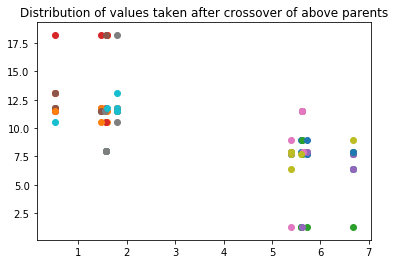

In [115]:
for i in range(50):
    x,y = (crossover([5.63, 11.53], [1.56, 7.94]))
    plt.scatter(x[0], x[1])
    plt.scatter(y[0], y[1])
plt.title("Distribution of values taken after crossover of above parents")

In [146]:
def mutation(child, nvar = 2, ndec = 2, chromosome_size = 11, mutRate = 0.005):
    """
    Performs mutation on the child by converting it to binary and flipping each bit on prob = mutRate
    NOTE - Does not do applyBounds
    """
    childBin = float2binary(child, nvar = 2, ndec = 2, chromosome_size = 11)
    flip = np.int32(np.random.randn(chromosome_size*nvar)<=mutRate)
    mutChild = ''
    
    for i in range(chromosome_size*nvar):
        mutChild = mutChild + flipBit(childBin[i], flip[i])
    mutChild = binary2float(mutChild, nvar, ndec, chromosome_size)
    return mutChild

In [161]:
mutation([8.63,19.56])

[7.85, 14.82]